In [1]:
import os
import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

import torch 

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from MED.dataset.preprocessing_utils import convert_videos_to_frames, process_errors, process_kinematics, process_errors, \
    create_pkl_files, delete_unmatched_frames, delete_unmatched_kinematics, delete_gesture_frames, delete_gesture_vectors, process_gestures
from MED.dataset.dataset_utils import create_siamese_pairs, compute_window_size_stride

## 1. Data Processing

### 1.1. Video to frame conversion (5/30Hz)

In [2]:
#Define video folders and output folders
run = True

if run:
    video_folder_needle_passing = "../data/raw/Needle_Passing/video/"
    video_folder_suturing = "../data/raw/Suturing/video/"

    frequency = 5 
    output_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/frames/"
    output_folder_suturing = f"../data/{frequency}Hz/Suturing/frames/"

    #Convert videos to frames
    convert_videos_to_frames(video_folder_needle_passing, output_folder_needle_passing, frequency)
    convert_videos_to_frames(video_folder_suturing, output_folder_suturing, frequency)

Processing Needle_Passing_E001_capture2.avi...
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Processing Needle_Passing_H005_capture2.avi...
Conversion complete.
Processing Needle_Passing_H002_capture2.avi...
Conversion complete.
Conversion complete.
Conversion complete.
Conversion complete.
Processing Needle_Passing_H004_capture2.avi...
Conversion complete.
Processing Needle_Passing_B001_capture2.avi...
Conversion complete.
Conversion complete.
Conversion complete.
Processing Needle_Passing_F004_capture2.avi...
Conversion complete.
Processing Needle_Passing_F003_capture2.avi...
Conversion complete.
Conversion complete.
Processing Needle_Passing_I003_capture2.avi...
Conversion complete.
Processing Needle_Passing_I004_capture2.avi...
Conversion complete.
Conversion complete.
Conversion complete.
Processing Needle_Passing_C001_capture2.avi...
Conversion complete.
Processing Needle_Passing_D001_capture2.avi...
Conversion complete.
Conversion complete.


### 1.2. Kinematics data

In [3]:
kinematics_folder_needle_passing = "../data/raw/Needle_Passing/kinematics/AllGestures"
kinematics_folder_suturing = "../data/raw/Suturing/kinematics/AllGestures"

#Create output folder for processed kinematics data
frequency = 5
output_folder_kinematics_processed_needle_passing = f"../data/{frequency}Hz/Needle_Passing/kinematics/"
output_folder_kinematics_processed_suturing = f"../data/{frequency}Hz/Suturing/kinematics/"

process_kinematics(kinematics_folder_needle_passing, output_folder_kinematics_processed_needle_passing, frequency)
process_kinematics(kinematics_folder_suturing, output_folder_kinematics_processed_suturing, frequency)

Processing Needle_Passing_C001.txt...
Processing Needle_Passing_C003.txt...
Processing Needle_Passing_C002.txt...
Processing Needle_Passing_C005.txt...
Processing Needle_Passing_C004.txt...
Processing Needle_Passing_E002.txt...
Processing Needle_Passing_I002.txt...
Processing Needle_Passing_I003.txt...
Processing Needle_Passing_E003.txt...
Processing Needle_Passing_E001.txt...
Processing Needle_Passing_I001.txt...
Processing Needle_Passing_G004.txt...
Processing Needle_Passing_G005.txt...
Processing Needle_Passing_E004.txt...
Processing Needle_Passing_G001.txt...
Processing Needle_Passing_I004.txt...
Processing Needle_Passing_I005.txt...
Processing Needle_Passing_E005.txt...
Processing Needle_Passing_G002.txt...
Processing Needle_Passing_G003.txt...
Processing Needle_Passing_B002.txt...
Processing Needle_Passing_B003.txt...
Processing Needle_Passing_B001.txt...
Processing Needle_Passing_B004.txt...
Processing Needle_Passing_B005.txt...
Processing Needle_Passing_F005.txt...
Processing N

### 1.3. Gestures

In [4]:
gestures_folder_needle_passing = "../data/raw/Needle_Passing/transcriptions"
gestures_folder_suturing = "../data/raw/Suturing/transcriptions"

frequency = 5
gesture_folder_needle_passing_output = f"../data/{frequency}Hz/Needle_Passing/gestures/"
gesture_folder_suturing_output = f"../data/{frequency}Hz/Suturing/gestures/"

if not os.path.exists(gesture_folder_needle_passing_output):
    os.makedirs(gesture_folder_needle_passing_output)

if not os.path.exists(gesture_folder_suturing_output):
    os.makedirs(gesture_folder_suturing_output)

process_gestures(gestures_folder_needle_passing, gesture_folder_needle_passing_output, frequency=frequency)
process_gestures(gestures_folder_suturing, gesture_folder_suturing_output, frequency=frequency)

Processing Needle_Passing_C001.txt...
Processing Needle_Passing_C003.txt...
Processing Needle_Passing_C002.txt...
Processing Needle_Passing_C005.txt...
Processing Needle_Passing_C004.txt...
Processing Needle_Passing_I002.txt...
Processing Needle_Passing_I003.txt...
Processing Needle_Passing_E003.txt...
Processing Needle_Passing_E001.txt...
Processing Needle_Passing_E004.txt...
Processing Needle_Passing_I004.txt...
Processing Needle_Passing_I005.txt...
Processing Needle_Passing_E005.txt...
Processing Needle_Passing_B002.txt...
Processing Needle_Passing_B003.txt...
Processing Needle_Passing_B001.txt...
Processing Needle_Passing_B004.txt...
Processing Needle_Passing_D001.txt...
Processing Needle_Passing_F004.txt...
Processing Needle_Passing_D003.txt...
Processing Needle_Passing_D002.txt...
Processing Needle_Passing_H002.txt...
Processing Needle_Passing_F003.txt...
Processing Needle_Passing_H005.txt...
Processing Needle_Passing_D005.txt...
Processing Needle_Passing_D004.txt...
Processing N

### 1.4. Error Labels

In [52]:
folder_errors_needle_passing = "../data/raw/Error_Labels/Consensus_error_labels_needle_passing/"
folder_errors_suturing = "../data/raw//Error_Labels/Consensus_error_labels_suturing/"

transcription_folder_needle_passing = "../data/raw/Needle_Passing/transcriptions"
transcription_folder_suturing = "../data/raw/Suturing/transcriptions"

frequency = 5
output_folder_errors_needle_passing = f"../data/{frequency}Hz/Needle_Passing/errors/"
output_folder_errors_suturing = f"../data/{frequency}Hz/Suturing/errors/"

output_folder_kinematics_processed_needle_passing = f"../data/{frequency}Hz/Needle_Passing/kinematics/"
output_folder_kinematics_processed_suturing = f"../data/{frequency}Hz/Suturing/kinematics/"

error_dict = {
    'Out_Of_View': 'OutofView',
    'Needle_Drop': 'Needledrop',
    'Multiple_Attempts': 'attempts',
    'Needle_Position': 'needle_position',
    'Error': 'error'
}

error_dict_suturing = { 
    'Out_Of_View': 'outofview',
    'Needle_Drop': 'needledrop',
    'Multiple_Attempts': 'attempts',
    'Needle_Position': 'position',
    'Error': 'error'
}

#4.a.1. Needle Passing
task_type = "NP"
process_errors(folder_errors = folder_errors_needle_passing,
               output_folder = output_folder_errors_needle_passing,
               task_type = task_type,
               transcription_folder = transcription_folder_needle_passing,
               error_dict = error_dict,
               frequency=frequency,
               output_folder_kinematics = output_folder_kinematics_processed_needle_passing)
               

#4.a.2. Suturing
task_type = "S"
process_errors(folder_errors = folder_errors_suturing,
                output_folder = output_folder_errors_suturing,
                transcription_folder = transcription_folder_suturing,
                task_type = task_type,
                error_dict = error_dict_suturing,
                frequency=frequency,
                output_folder_kinematics = output_folder_kinematics_processed_suturing)

Processing Needle_Passing_C001.txt...
Processing Needle_Passing_C003.txt...
Processing Needle_Passing_C002.txt...
Processing Needle_Passing_C005.txt...
Processing Needle_Passing_C004.txt...
Processing Needle_Passing_I002.txt...
Processing Needle_Passing_I003.txt...
Processing Needle_Passing_E003.txt...
Processing Needle_Passing_E001.txt...
Processing Needle_Passing_E004.txt...
Processing Needle_Passing_I004.txt...
Processing Needle_Passing_I005.txt...
Processing Needle_Passing_E005.txt...
Processing Needle_Passing_B002.txt...
Processing Needle_Passing_B003.txt...
Processing Needle_Passing_B001.txt...
Processing Needle_Passing_B004.txt...
Processing Needle_Passing_D001.txt...
Processing Needle_Passing_F004.txt...
Processing Needle_Passing_D003.txt...
Processing Needle_Passing_D002.txt...
Processing Needle_Passing_H002.txt...
Processing Needle_Passing_F003.txt...
Processing Needle_Passing_H005.txt...
Processing Needle_Passing_D005.txt...
Processing Needle_Passing_D004.txt...
Processing N

### 1.5. Delete frames in Video-Kinematics Data which are not included in the transcriptions

In [53]:
frequency = 5
image_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/frames/"
image_folder_suturing = f"../data/{frequency}Hz/Suturing/frames/"

transcription_folder_needle_passing= "../data/raw/Needle_Passing/transcriptions"
transcription_folder_suturing = "../data/raw/Suturing/transcriptions"

delete_unmatched_frames(image_folder_needle_passing, transcription_folder_needle_passing)
delete_unmatched_frames(image_folder_suturing, transcription_folder_suturing)

Processing Needle_Passing_H004...
Processing Needle_Passing_D001...
Processing Needle_Passing_H005...
Processing Needle_Passing_H002...
Processing .DS_Store...
Processing Needle_Passing_E001...
Processing Needle_Passing_I005...
Processing Needle_Passing_I002...
Processing Needle_Passing_I003...
Processing Needle_Passing_I004...
Processing Needle_Passing_B003...
Processing Needle_Passing_B004...
Processing Needle_Passing_F004...
Processing Needle_Passing_F003...
Processing Needle_Passing_B002...
Processing Needle_Passing_C005...
Processing Needle_Passing_C002...
Processing Needle_Passing_C003...
Processing Needle_Passing_C004...
Processing Needle_Passing_D004...
Processing Needle_Passing_D003...
Processing Needle_Passing_D002...
Processing Needle_Passing_D005...
Processing Needle_Passing_E005...
Processing Needle_Passing_E004...
Processing Needle_Passing_E003...
Processing Needle_Passing_F001...
Processing Needle_Passing_B001...
Processing Needle_Passing_C001...
Processing Suturing_D002

In [54]:
frequency = 5
kinematics_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/kinematics/"
kinematics_folder_suturing = f"../data/{frequency}Hz/Suturing/kinematics/"

transcription_folder_needle_passing = "../data/raw/Needle_Passing/transcriptions"
transcription_folder_suturing = "../data/raw/Suturing/transcriptions"

delete_unmatched_kinematics(kinematics_folder_needle_passing, transcription_folder_needle_passing)
delete_unmatched_kinematics(kinematics_folder_suturing, transcription_folder_suturing)

Processing Needle_Passing_B001.csv...
Processing Needle_Passing_B002.csv...
Processing Needle_Passing_B003.csv...
Processing Needle_Passing_B004.csv...
Processing Needle_Passing_B005.csv...
Transcription file ../data/raw/Needle_Passing/transcriptions/Needle_Passing_B005.txt does not exist. Skipping Needle_Passing_B005.csv.
Processing Needle_Passing_H003.csv...
Transcription file ../data/raw/Needle_Passing/transcriptions/Needle_Passing_H003.txt does not exist. Skipping Needle_Passing_H003.csv.
Processing Needle_Passing_D003.csv...
Processing Needle_Passing_D002.csv...
Processing Needle_Passing_H002.csv...
Processing Needle_Passing_F005.csv...
Transcription file ../data/raw/Needle_Passing/transcriptions/Needle_Passing_F005.txt does not exist. Skipping Needle_Passing_F005.csv.
Processing Needle_Passing_D001.csv...
Processing Needle_Passing_H001.csv...
Transcription file ../data/raw/Needle_Passing/transcriptions/Needle_Passing_H001.txt does not exist. Skipping Needle_Passing_H001.csv.
Proc

### 1.6 Delete frames that belong to gestures 10/11

In [55]:
#6.a. Delete frames for Needle Passing
frequency = 5
image_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/frames/"
kinematics_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/kinematics/"
error_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/errors/"
transcriptions_folder_needle_passing = "../data/raw/Needle_Passing/transcriptions"

delete_gesture_frames(image_folder_needle_passing,
                        kinematics_folder_needle_passing,
                        error_folder_needle_passing,
                        transcriptions_folder_needle_passing)

#6.b. Delete frames for Suturing
image_folder_suturing = f"../data/{frequency}Hz/Suturing/frames/"
kinematics_folder_suturing = f"../data/{frequency}Hz/Suturing/kinematics/"
error_folder_suturing = f"../data/{frequency}Hz/Suturing/errors/"
transcription_folder_needle_passing = "../data/raw/Suturing/transcriptions" 

delete_gesture_frames(image_folder_suturing,
                        kinematics_folder_suturing,
                        error_folder_suturing,
                        transcription_folder_needle_passing)

In [56]:
#Delete the 10-11 gestures from the vectors
frequency = 5
gestures_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/gestures/"
gestures_folder_suturing = f"../data/{frequency}Hz/Suturing/gestures/"

delete_gesture_vectors(gestures_folder_needle_passing)
delete_gesture_vectors(gestures_folder_suturing)

Processing Needle_Passing_D001.npy...
Processing Needle_Passing_F004.npy...
Processing Needle_Passing_D003.npy...
Processing Needle_Passing_D002.npy...
Processing Needle_Passing_H002.npy...
Processing Needle_Passing_F003.npy...
Processing Needle_Passing_H005.npy...
Processing Needle_Passing_D005.npy...
Processing Needle_Passing_D004.npy...
Processing Needle_Passing_F001.npy...
Processing Needle_Passing_H004.npy...
Processing Needle_Passing_B002.npy...
Processing Needle_Passing_B003.npy...
Processing Needle_Passing_B001.npy...
Processing Needle_Passing_B004.npy...
Processing Needle_Passing_I002.npy...
Processing Needle_Passing_I003.npy...
Processing Needle_Passing_E003.npy...
Processing Needle_Passing_E001.npy...
Processing Needle_Passing_E004.npy...
Processing Needle_Passing_I004.npy...
Processing Needle_Passing_I005.npy...
Processing Needle_Passing_E005.npy...
Processing Needle_Passing_C001.npy...
Processing Needle_Passing_C003.npy...
Processing Needle_Passing_C002.npy...
Processing N

## 2. Create .pkl file with processed data 

The following code blocks create data ready for model construction.

In [57]:
#Create .pkl files
frequency = 5
raw = False

image_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/frames/"
image_folder_suturing = f"../data/{frequency}Hz/Suturing/frames/"
kinematics_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/kinematics/"
kinematics_folder_suturing = f"../data/{frequency}Hz/Suturing/kinematics/"
gestures_folder_needle_passing = f"../data/{frequency}Hz/Needle_Passing/gestures/"
gestures_folder_suturing = f"../data/{frequency}Hz/Suturing/gestures/"
error_folder_errors_needle_passing = f"../data/{frequency}Hz/Needle_Passing/errors/"
error_folder_errors_suturing = f"../data/{frequency}Hz/Suturing/errors/"

if raw:
    output_folder_needle_passing = f"../data/LOSO/{frequency}Hz_All/"
    output_folder_suturing = f"../data/LOSO/{frequency}Hz_All/"
else:
    output_folder_needle_passing = f"../data/LOSO/{frequency}Hz/"
    output_folder_suturing = f"../data/LOSO/{frequency}Hz/"

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

#Process Needle Passing data
create_pkl_files(image_folder_needle_passing, 
                 kinematics_folder_needle_passing, 
                 gestures_folder_needle_passing, 
                 error_folder_errors_needle_passing, 
                 output_folder_needle_passing,
                 task_type="NP",
                 device=device,
                 raw=raw)

#Process Suturing data
create_pkl_files(image_folder_suturing, 
                 kinematics_folder_suturing, 
                 gestures_folder_suturing, 
                 error_folder_errors_suturing, 
                 output_folder_suturing,
                 task_type="S",
                 device=device,
                 folds=['1Out', '2Out', '3Out', '4Out', '5Out'],
                 raw=raw)



Processing Needle_Passing_H004...
Processing Needle_Passing_D001...
Processing Needle_Passing_H005...
Processing Needle_Passing_H002...
Processing .DS_Store...
Processing Needle_Passing_E001...
Processing Needle_Passing_I005...
Processing Needle_Passing_I002...
Processing Needle_Passing_I003...
Processing Needle_Passing_I004...
Processing Needle_Passing_B003...
Processing Needle_Passing_B004...
Processing Needle_Passing_F004...
Processing Needle_Passing_F003...
Processing Needle_Passing_B002...
Processing Needle_Passing_C005...
Processing Needle_Passing_C002...
Processing Needle_Passing_C003...
Processing Needle_Passing_C004...
Processing Needle_Passing_D004...
Processing Needle_Passing_D003...
Processing Needle_Passing_D002...
Processing Needle_Passing_D005...
Processing Needle_Passing_E005...
Processing Needle_Passing_E004...
Processing Needle_Passing_E003...
Processing Needle_Passing_F001...
Processing Needle_Passing_B001...
Processing Needle_Passing_C001...
All .pkl files created.


In [58]:
#Check first .pkl file created
output_folder = f"../data/LOSO/5Hz/3Out"
filename = os.path.join(output_folder, "Suturing_I002.pkl")

with open(filename, 'rb') as f:
    data = pickle.load(f)

images = data['image_feats']
kinematics = data['kinematics_feats']
g_labels = data['g_labels']
e_labels = data['e_labels']
frames = data['frames'] 

#print(f"Images shape: {images.shape}")

#Print type of each variable
print(f"Type of images: {type(images)}")
print(f"Type of kinematics: {type(kinematics)}")
print(f"Type of gesture labels: {type(g_labels)}")
print(f"Type of error labels: {type(e_labels)}")
print(f"Type of frames: {type(frames)}")

#Print shapes of each variable
print(f"Shape of kinematics: {kinematics.shape}")
print(f"Shape of gesture labels: {g_labels.shape}")
print(f"Shape of error labels: {e_labels.shape}")
print(f"Shape of frames: {len(frames)}")

#Plot a random image
import matplotlib.pyplot as plt
import random
random_index = random.randint(0, len(kinematics) - 1)
#image = images[random_index].numpy().transpose(1, 2, 0)  #Convert to HWC format for plotting
# Normalize the image if necessary
#image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1] range
#plt.imshow(image)
#plt.title(f"Frame: {frames[random_index]}")
#plt.axis('off')
#plt.show()

#Print that frame's kinematics
print(f"Kinematics for frame {frames[random_index]}: {kinematics[random_index]}")

#Print that frame's gesture label
print(f"Gesture label for frame {frames[random_index]}: {g_labels[random_index]}")

#Print that frame's error label
print(f"Error label for frame {frames[random_index]}: {e_labels[random_index]}")

Type of images: <class 'list'>
Type of kinematics: <class 'torch.Tensor'>
Type of gesture labels: <class 'numpy.ndarray'>
Type of error labels: <class 'torch.Tensor'>
Type of frames: <class 'numpy.ndarray'>
Shape of kinematics: torch.Size([721, 26])
Shape of gesture labels: (721,)
Shape of error labels: torch.Size([721, 5])
Shape of frames: 721
Kinematics for frame 3613: tensor([ 4.7727e-02,  3.9700e-02, -1.1737e-02,  1.1882e+00, -1.3051e+00,
         2.6306e+00, -6.8300e-03,  2.5470e-03, -5.5880e-03,  3.5814e-02,
         1.7244e-02, -4.0237e-02, -7.8049e-01,  7.8632e-02,  2.6690e-02,
        -5.4608e-02,  1.1980e+00,  9.9446e-01, -2.9883e+00, -2.3000e-05,
        -1.1200e-04, -7.7000e-05, -1.7718e-02, -5.3570e-03, -5.2020e-03,
        -8.5419e-01])
Gesture label for frame 3613: 4
Error label for frame 3613: tensor([0., 0., 0., 0., 0.])


In [59]:
#Delete Gesture 9 from Needle_Passing_C005.pkl in each fold data (5Hz)
outs = ['1Out', '2Out', '3Out', '4Out', '5Out']

for out in outs:
    filename = f"../data/LOSO/5Hz/{out}/Needle_Passing_C005.pkl"
    with open(filename, 'rb') as f:
        data = pickle.load(f)

    #Delete Gesture 9
    indices_to_delete = [i for i, g in enumerate(data['g_labels']) if g == 9]
    print(indices_to_delete)
    
    for key in data.keys():
        data[key] = [item for i, item in enumerate(data[key]) if i not in indices_to_delete]

        if key == 'image_feats':
            pass
        
        elif key == 'kinematics_feats' or key == 'e_labels':
            #Convert to torch tensor
            data[key] = torch.stack(data[key]) if isinstance(data[key], list) else data[key]

        else:
            #Save as np.array
            data[key] = pd.Series(data[key]).to_numpy()

    #Check sizes of all variables
    print(f"Sizes after deletion in {filename}:")
    for key, value in data.items():
        print(f"{key}: {value.shape if isinstance(value, torch.Tensor) else len(value)}")

    with open(filename, 'wb') as f:
        pickle.dump(data, f)


[127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
Sizes after deletion in ../data/LOSO/5Hz/1Out/Needle_Passing_C005.pkl:
image_feats: 0
kinematics_feats: torch.Size([369, 26])
g_labels: 369
e_labels: torch.Size([369, 5])
frames: 369
[127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
Sizes after deletion in ../data/LOSO/5Hz/2Out/Needle_Passing_C005.pkl:
image_feats: 0
kinematics_feats: torch.Size([369, 26])
g_labels: 369
e_labels: torch.Size([369, 5])
frames: 369
[127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
Sizes after deletion in ../data/LOSO/5Hz/3Out/Needle_Passing_C005.pkl:
image_feats: 0
kinematics_feats: torch.Size([369, 26])
g_labels: 369
e_labels: t

## 3. Change content of train.csv and test.csv

In [10]:
root_dir = "../data/LOSO/"
for out in ["1Out", "2Out", "3Out", "4Out", "5Out"]:
    out_dir = os.path.join(root_dir, out)
    
    #Load .csv
    train_csv = os.path.join(out_dir, "train.csv")
    test_csv = os.path.join(out_dir, "test.csv")
    train_df = pd.read_csv(train_csv, header=None, names=['trial'])
    test_df = pd.read_csv(test_csv, header=None, names=['trial'])

    #Replace .csv with .pkl in the trial column
    train_df['trial'] = train_df['trial'].str.replace('.csv', '.pkl')
    test_df['trial'] = test_df['trial'].str.replace('.csv', '.pkl')

    #Save the updated dataframes
    train_df.to_csv(train_csv, index=False, header=False)
    test_df.to_csv(test_csv, index=False, header=False)

## 4. Create Train and Test pair indicators for Siamese Neural Networks.

In [2]:
#This block of code creates siamese pairs for the LOSO dataset fold by fold. The created dfs are of the form: 
#train_pairs_df = pd.DataFrame(columns=['subject_1', 'gesture_label_1', 'position_1', 'subject_2', 'gesture_label_2', 'position_2', 'label])

#We need to store the dfs as .csv in the corresponding fold_data_path as train_pairs.csv and test_pairs.csv

outs = ['1Out','2Out','3Out','4out', '5out']

setting = 'LOSO'
exp_kwargs = {
    'frequency': 5,
    'siamese': True,
    'binary_error': True,
    'n_comparisons': 20}
  
window_size, stride = compute_window_size_stride(exp_kwargs['frequency'])

for out in outs:

    #test_roc_auc_fold, test_f1_fold, test_jaccard_fold, test_acc_fold, test_precision_fold, test_recall_fold, \
    #test_fpr_fold, test_tpr_fold, test_class_report_fold, test_cm_fold, \
    #train_f1_fold, train_acc_fold, train_auc_roc_fold, train_jaccard_fold, train_loss_fold, test_loss_fold = \
    #([] for _ in range(16))

    #best_f1 = 0.0

    #a. Load training and testing data
    print(f"Loading data for {setting} with trial {out}...")
    fold_data_path = f"../data/LOSO/{exp_kwargs['frequency']}Hz/" + out + '/'
    
    #b. Create train and test pairs
    print(f"Creating pairs for {setting} with trial {out}...")
    train_pairs_df, position_to_instance_df = create_siamese_pairs(fold_data_path=fold_data_path, video_data_path=f"../../Chain-of-Gesture/dataset/setting_f1/LOSO/All/{out}",
                                                                   window_size=window_size, stride=stride, train=True, exp_kwargs=exp_kwargs)
    test_pairs_df = create_siamese_pairs(fold_data_path=fold_data_path,
                                         video_data_path=f"../../Chain-of-Gesture/dataset/setting_f1/LOSO/All/{out}",
                                          window_size=window_size, stride=stride, train=False, exp_kwargs=exp_kwargs, position_to_instance_df=position_to_instance_df)
    exp_kwargs['n_comparisons'] = 50
    test_pairs_df_50 = create_siamese_pairs(fold_data_path=fold_data_path, video_data_path=f"../../Chain-of-Gesture/dataset/setting_f1/LOSO/All/{out}",
                                             window_size=window_size, stride=stride, train=False, exp_kwargs=exp_kwargs, position_to_instance_df=position_to_instance_df)

    #c. Save the pairs as .csv
    train_pairs_df.to_csv(os.path.join(fold_data_path, 'train_pairs.csv'), index=False)
    test_pairs_df.to_csv(os.path.join(fold_data_path, f'test_pairs_20.csv'), index=False)
    test_pairs_df_50.to_csv(os.path.join(fold_data_path, 'test_pairs_50.csv'), index=False)
    

Loading data for LOSO with trial 1Out...
Creating pairs for LOSO with trial 1Out...
Windowing data...
Processed 0/3109 training windows.
Processed 200/3109 training windows.
Processed 400/3109 training windows.
Processed 600/3109 training windows.
Processed 800/3109 training windows.
Processed 1000/3109 training windows.
Processed 1200/3109 training windows.
Processed 1400/3109 training windows.
Processed 1600/3109 training windows.
Processed 1800/3109 training windows.
Processed 2000/3109 training windows.
Processed 2200/3109 training windows.
Processed 2400/3109 training windows.
Processed 2600/3109 training windows.
Processed 2800/3109 training windows.
Processed 3000/3109 training windows.
Number of pairs created: 3380734
Windowing data...
3099 4
Processed 0/1057 test windows.
Processed 200/1057 test windows.
Processed 400/1057 test windows.
Processed 600/1057 test windows.
Processed 800/1057 test windows.
Processed 1000/1057 test windows.
Number of pairs created: 21140
Windowing d

In [3]:
#Compute class balance in the train and test pairs
def compute_class_balance(pairs_df):
    class_counts = pairs_df['label'].value_counts()
    total_count = len(pairs_df)
    class_balance = {cls: count / total_count for cls, count in class_counts.items()}
    return class_balance

#Compute gesture-gesture balance (triangular matrix) for train and test pairs
def compute_gesture_balance(pairs_df):
    balance_matrix = {}

    for _, row in pairs_df.iterrows():
        #Use groupby and count
        gesture_1 = row['gesture_label_1']
        gesture_2 = row['gesture_label_2']
        
        if gesture_1 not in balance_matrix:
            balance_matrix[gesture_1] = {}
        
        if gesture_2 not in balance_matrix[gesture_1]:
            balance_matrix[gesture_1][gesture_2] = 0
        
        balance_matrix[gesture_1][gesture_2] += 1

    #Convert to a DataFrame for better visualization
    balance_matrix = pd.DataFrame(balance_matrix).fillna(0).astype(int)

    return balance_matrix

In [8]:
#Compute class balance for train and test pairs
for out in outs:
    fold_data_path = f"../data/LOSO/{exp_kwargs['frequency']}Hz/" + out + '/'
    
    train_pairs_df = pd.read_csv(os.path.join(fold_data_path, 'train_pairs.csv'))
    test_pairs_df = pd.read_csv(os.path.join(fold_data_path, f'test_pairs_{exp_kwargs["n_comparisons"]}.csv'))
 
    train_class_balance = compute_class_balance(train_pairs_df)
    test_class_balance = compute_class_balance(test_pairs_df)

    print(f"Class balance for {out} - Train: {train_class_balance}, Test: {test_class_balance}")

Class balance for 1Out - Train: {1: 0.7072606630559863, 0: 0.29273933694401366}, Test: {1: 0.7059369202226345, 0: 0.2940630797773655}
Class balance for 2Out - Train: {1: 0.7352186940262978, 0: 0.2647813059737022}, Test: {1: 0.6146907216494846, 0: 0.3853092783505155}
Class balance for 3Out - Train: {1: 0.7453559777734521, 0: 0.254644022226548}, Test: {1: 0.5619369369369369, 0: 0.4380630630630631}
Class balance for 4out - Train: {1: 0.754497941100796, 0: 0.24550205889920393}, Test: {1: 0.5160919540229885, 0: 0.4839080459770115}
Class balance for 5out - Train: {1: 0.7546585008924758, 0: 0.2453414991075242}, Test: {0: 0.5171875, 1: 0.4828125}


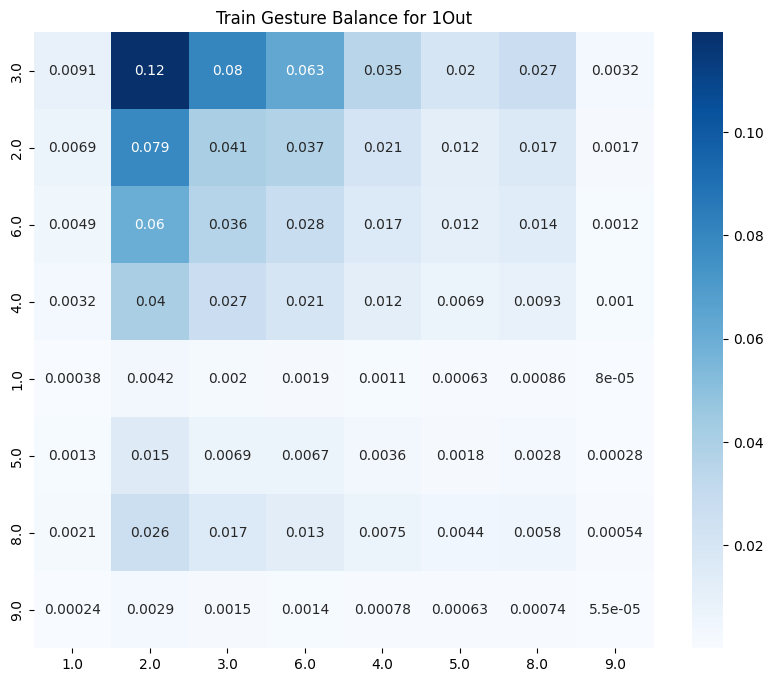

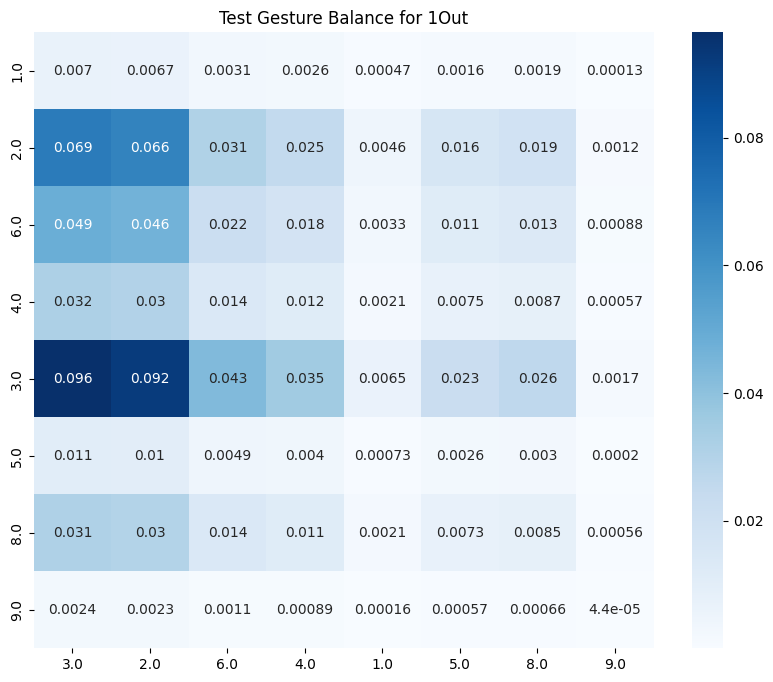

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Compute gesture-gesture balance for train and test pairs
for out in outs:
    fold_data_path = f"../data/LOSO/{exp_kwargs['frequency']}Hz/" + out + '/'
    
    train_pairs_df = pd.read_csv(os.path.join(fold_data_path, 'train_pairs.csv'))
    test_pairs_df = pd.read_csv(os.path.join(fold_data_path, 'test_pairs.csv'))

    train_gesture_balance = compute_gesture_balance(train_pairs_df)
    test_gesture_balance = compute_gesture_balance(test_pairs_df)

    train_gesture_balance /= len(train_pairs_df)
    test_gesture_balance /= len(test_pairs_df)

    #Plot matrices
    plt.figure(figsize=(10, 8))
    sns.heatmap(train_gesture_balance, annot=True, cmap='Blues')
    plt.title(f"Train Gesture Balance for {out}")
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(test_gesture_balance, annot=True, cmap='Blues')
    plt.title(f"Test Gesture Balance for {out}")
    plt.show()